cleaning up all over again

In [1]:
from conv_reproj import match
from align_and_diff import a_d
from header_setup import read

from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits
from pm import pm_correct
from astropy import units as u
from astropy.wcs import WCS
import cmasher as cmr

from astropy.time import Time
from astropy.coordinates import SkyCoord

Match function imported.
running


In [2]:
from everything import full_analysis

Ready to go!


In [3]:
from radial import radial_read
from dens import density_model

In [4]:
from everything import plot_1d, plot_2d

In [5]:
import os

lr = 'jan29_data/from_server/Betelgeuse_TC_cont.image.image.pbcor.fits' \
hr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'

In [6]:
cd

/Users/iman


In [7]:
hr = 'Documents/cuny_ms/jan29_data/from_server/Betelgeuse_TE_cont_R0.image.image.tt0.fits'
lr = 'Documents/cuny_ms/jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'


data3, data_1d3, radius3, data_dens_1d3, data_dens_2d3, data_plot3, info3 = full_analysis(hr,lr)
# this should be lr
info3['lr']['kspatres']
# this should be hr


False
First epoch shifted to second.
Header information imported.
Header information imported.


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy

0.040566339161841755

In [8]:
from everything import plot_1d, plot_1d_err,plot_1d_skip

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:283: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


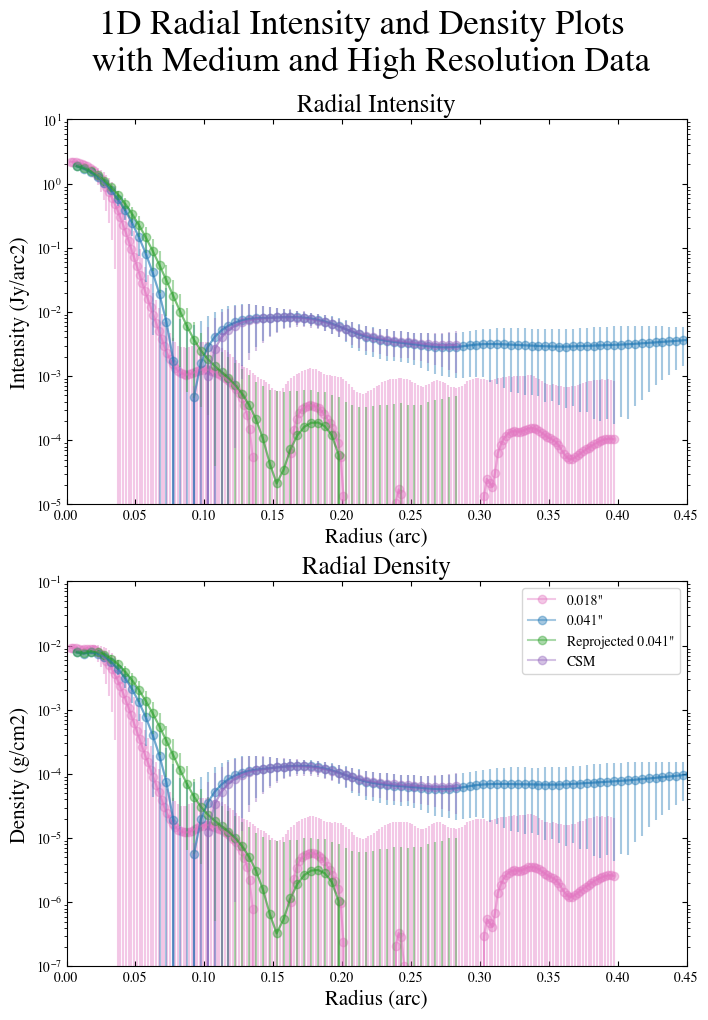

In [9]:
plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1, 
        suptitle = "1D Radial Intensity and Density Plots \n with Medium and High Resolution Data")#,xmax=0.35)
#plt.savefig('thesis/medhigh/1d_radial_all_MH.png')

#plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=-1e-1,ax1_ymax=6e5,ax2_ymin=1e0,ax2_ymax=1e1)#,xmax=0.35)

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


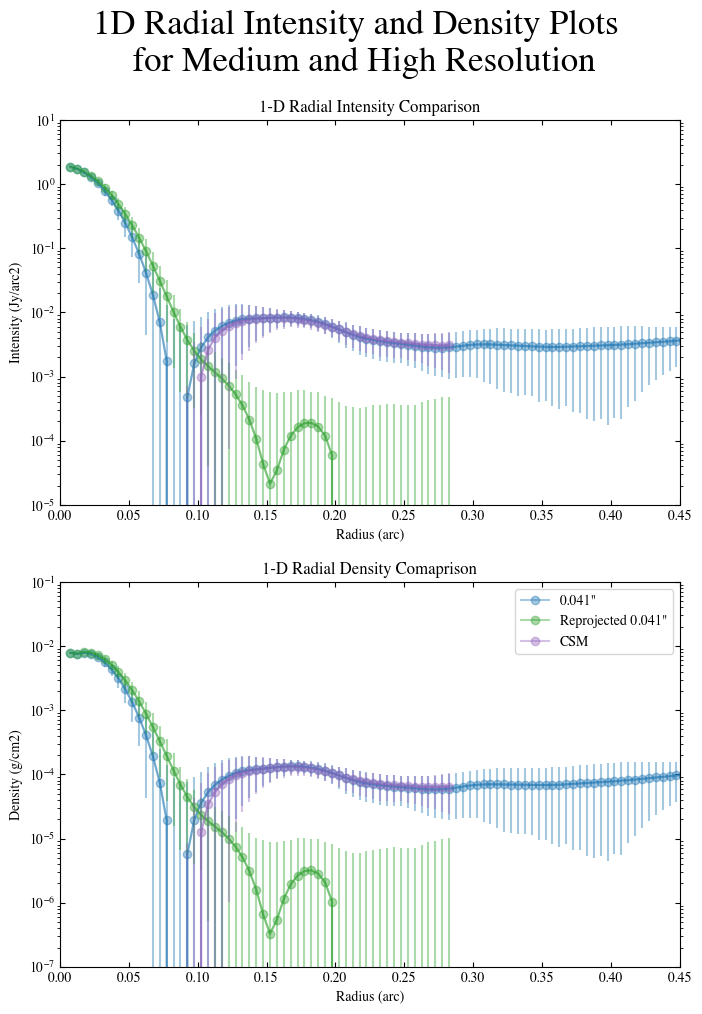

In [10]:
plot_1d_skip(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1,suptitle = "1D Radial Intensity and Density Plots \n for Medium and High Resolution")#,xmax=0.35)
# plt.savefig('thesis/medhigh/1d_radial_nohr_MH.png')

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


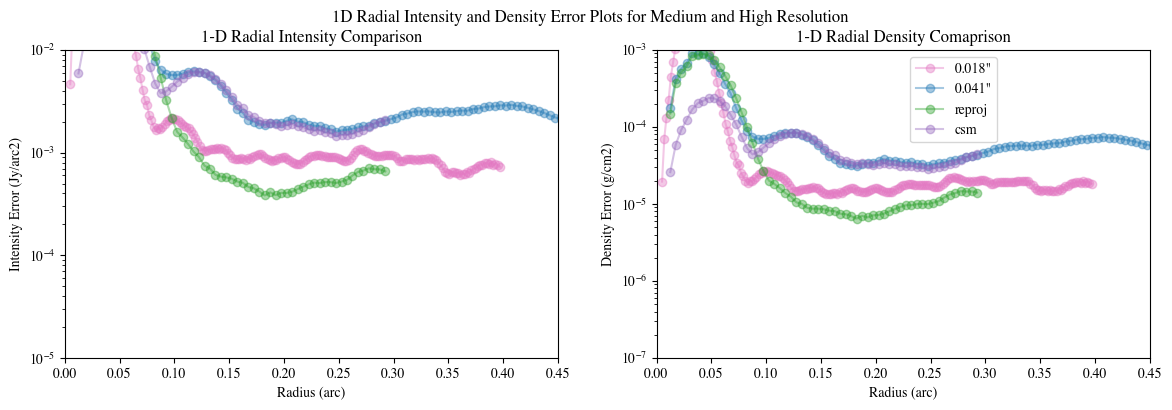

In [11]:
plot_1d_err(info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e-2,ax2_ymin=1e-7,ax2_ymax=1e-3,suptitle ="1D Radial Intensity and Density Error Plots for Medium and High Resolution")#,xmax=0.35)
#plt.savefig('thesis/medhigh/1d_err_MH.png')

In [12]:
from dens import kappa
from astropy.modeling.models import BlackBody


In [13]:
def max_test(data_1d):
    title = ['hr','lr','reproj','csm']
    lmda_AA = 8.87e6*u.AA
    
    B = BlackBody(temperature = 3000*u.K)
    B=B(lmda_AA)
    arcsec2_per_sr=4.25e10*u.arcsec**2/u.sr
    ergcmshz_per_jy = 1.0e-23*u.erg/u.cm**2/u.s/u.Hz/u.Jy
    k = kappa(887.0*u.um)

    B_jy_arcsec2 = B/arcsec2_per_sr/ergcmshz_per_jy

    sigma={}

    for i in title:
        sigma[i]= np.nanmax(np.nanmax(data_1d[i]))/ (k*B_jy_arcsec2)

    return sigma


In [14]:
from dens import temp

In [15]:
hrt = temp(radius3['hr']['pc_1d'])*u.K
lrt = temp(radius3['lr']['pc_1d'])*u.K

In [16]:
from radial import sm

In [17]:
r_sun_pc = sm(168,0.0295)

In [18]:
type(hrt)

astropy.units.quantity.Quantity

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_57732/1036001852.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,8)


(0.07965550148386866, 8.0)

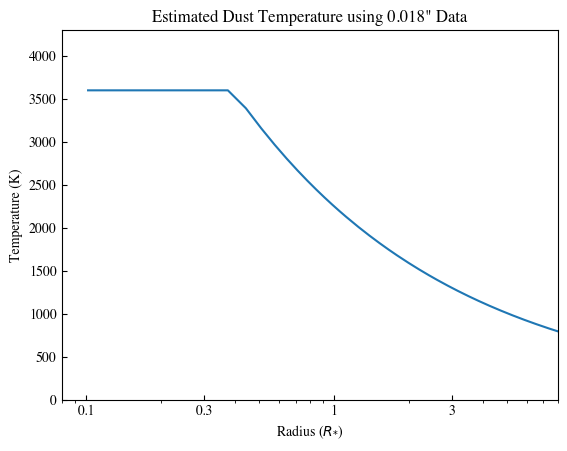

In [19]:
plt.plot(radius3['hr']['pc_1d'].value/r_sun_pc,hrt,label = "HR temp")
#plt.plot(radius3['lr']['pc_1d'].value/r_sun_pc,lrt, label = "LR temp")
plt.semilogx()
plt.xlabel(r"Radius ($R_{*}$)")
plt.ylabel("Temperature (K)")
plt.title('Estimated Dust Temperature using 0.018" Data')
plt.xticks([.1,0.3,1,3,10],[.1,0.3,1,3,10])
plt.tick_params(direction = 'in')
plt.ylim(0,4300)
#plt.legend()
plt.xlim(0,8)

In [20]:
info3['hr']['pix_size_arcsec']

<Quantity 0.002 arcsec>

In [21]:
max_test(data_1d3)

{'hr': <Quantity 0.01111003 g / cm2>,
 'lr': <Quantity 0.00941045 g / cm2>,
 'reproj': <Quantity 0.0094502 g / cm2>,
 'csm': <Quantity 4.17848432e-05 g / cm2>}

In [22]:
print("hr: ",np.nanmax(data_dens_1d3['hr']))
print("lr: ",np.nanmax(data_dens_1d3['lr']))
print("reproj: ",np.nanmax(data_dens_1d3['reproj']))
print("csm: ",np.nanmax(data_dens_1d3['csm']))

hr:  0.009254187779894767 g / cm2
lr:  0.00786872949798627 g / cm2
reproj:  0.008077289985025526 g / cm2
csm:  0.0001319119209338921 g / cm2


In [23]:
np.where(data3['csm']['jy_arc2']== np.nanmax(data3['csm']['jy_arc2']))

(array([509]), array([476]))

In [24]:
print("1D intensity")
print("hr: ",np.nanmax(data_1d3['hr']), r'$\pm', info3['hr']['error'][1])
print("lr: ",np.nanmax(data_1d3['lr']), r'$\pm',info3['lr']['error'][1])
print("reproj: ",np.nanmax(data_1d3['reproj']))
print("csm: ",np.nanmax(data_1d3['csm']))

1D intensity
hr:  2.1963255717590267 Jy / arcsec2 $\pm 0.004634624347090721
lr:  1.8603376421427442 Jy / arcsec2 $\pm 0.039765410125255585
reproj:  1.8681958130259915 Jy / arcsec2
csm:  0.008260381346586724 Jy / arcsec2


In [25]:
print("Intensity in 2D")
print("hr: ",np.nanmax(data3['hr']['jy_arc2']))
print("lr: ",np.nanmax(data3['lr']['jy_arc2']))
print("reproj: ",np.nanmax(data3['reproj']['jy_arc2_norm']))
print("csm: ",np.nanmax(data3['csm']['jy_arc2']))

Intensity in 2D
hr:  2.209624767303467
lr:  1.962192416191101
reproj:  1.962192416191101
csm:  0.017604399202110436


In [26]:
print("2d density")
print("hr: ",np.nanmax(data_dens_2d3['hr']))
print("lr: ",np.nanmax(data_dens_2d3['lr']))
print("reproj: ",np.nanmax(data_dens_2d3['reproj']))
print("csm: ",np.nanmax(data_dens_2d3['csm']))

2d density
hr:  0.011771002750759915 g / cm2
lr:  0.008507368557185029 g / cm2
reproj:  0.00879180757202979 g / cm2
csm:  0.0002457810461657984 g / cm2


csm, lr and reproj all get mapped to the same thing

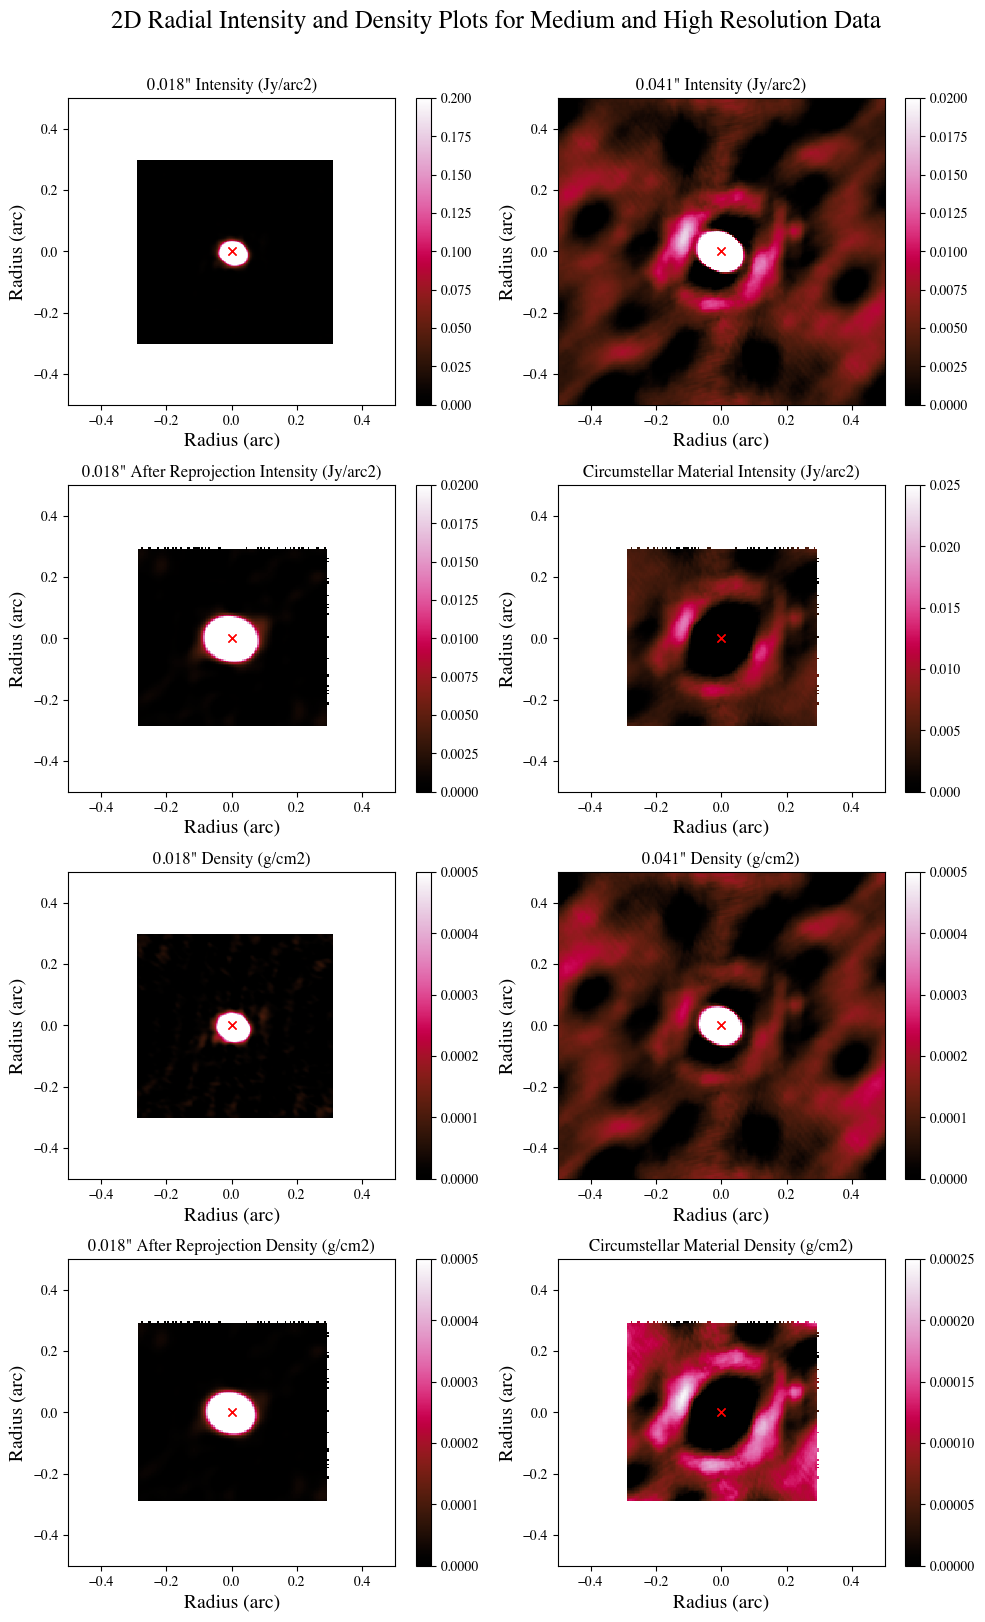

In [27]:
vminmax = [[0,.2], [0,.02],[0,.02],[0,0.025],
           [0,0.0005], [0,0.0005],[0,0.0005],[0,0.00025]]
plot_2d(data_plot3, info3, vminmax,minn=-.5, suptitle = "2D Radial Intensity and Density Plots for Medium and High Resolution Data")
#plt.savefig('thesis/medhigh/2D_plots_MH.png')

In [28]:
data3['hr']['jy_beam'].max()

0.07832027

## Abel transform

In [29]:
from abel import all_abel, do_abel, plot_1d_abel

In [30]:
d = {'hr': data_1d3['hr'], 'lr': data_1d3['lr'], 'reproj': data_1d3['reproj'],"csm": data_1d3['csm']}
i = {'hr': info3['hr'], 'lr': info3['lr'], 'reproj': info3['reproj'],"csm": info3['csm']}

In [31]:
d['hr']

<Quantity [ 2.19632557e+00,  2.17611911e+00,  2.14418875e+00,
            2.09892392e+00,  2.03853636e+00,  1.96144882e+00,
            1.86674485e+00,  1.75450417e+00,  1.62616704e+00,
            1.48450743e+00,  1.33347179e+00,  1.17772759e+00,
            1.02225043e+00,  8.71579082e-01,  7.29830199e-01,
            6.00082345e-01,  4.84485684e-01,  3.84255611e-01,
            2.99522283e-01,  2.29793214e-01,  1.73756971e-01,
            1.29800544e-01,  9.60860745e-02,  7.07238634e-02,
            5.19944544e-02,  3.83090292e-02,  2.83816220e-02,
            2.11657601e-02,  1.58725364e-02,  1.19446563e-02,
            8.99129387e-03,  6.76178027e-03,  5.08312156e-03,
            3.83611734e-03,  2.92948231e-03,  2.28629413e-03,
            1.84230167e-03,  1.54165788e-03,  1.34082322e-03,
            1.20787380e-03,  1.12249203e-03,  1.07400578e-03,
            1.05689945e-03,  1.06782249e-03,  1.10135267e-03,
            1.14901229e-03,  1.19976677e-03,  1.24234633e-03,
        

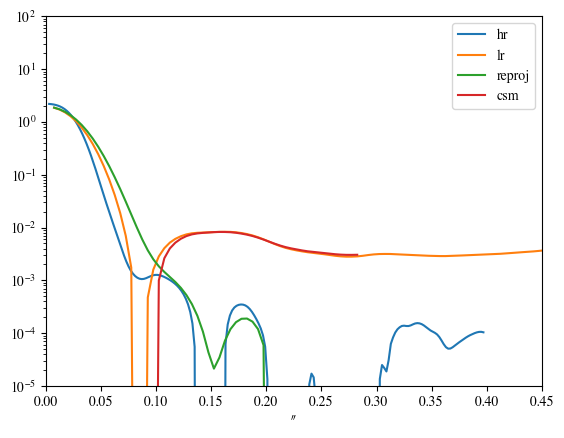

In [32]:
t = ['hr','lr','reproj','csm']
for j in t:
    temp = d[j].copy().value
    temp[temp<0]=1e-16#i[j]['median']
    plt.plot(radius3[j]['arc_1d'],temp,label = j)
    plt.legend()
    plt.xlim(0,.45)
    plt.ylim(1e-5,1e2)
    plt.semilogy()

In [33]:
abels = all_abel(d,radius3,i)

/Users/iman/Documents/cuny_ms/csm_pipeline/abel.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


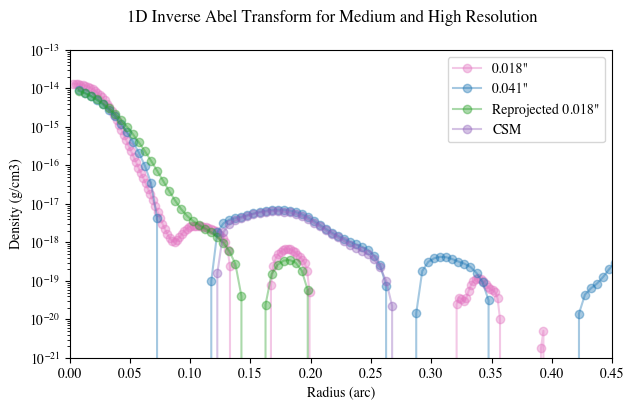

In [34]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "1D Inverse Abel Transform for Medium and High Resolution")


In [35]:
info3['lr']['pix_size_arcsec']

<Quantity 0.005 arcsec>

/Users/iman/Documents/cuny_ms/csm_pipeline/abel.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


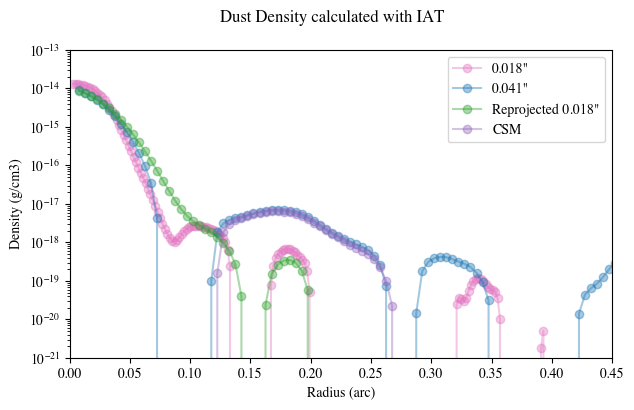

In [122]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "Dust Density calculated with IAT")
plt.savefig('Documents/cuny_ms/csm_pipeline/thesis/medhigh/1d_abel_MH.png')

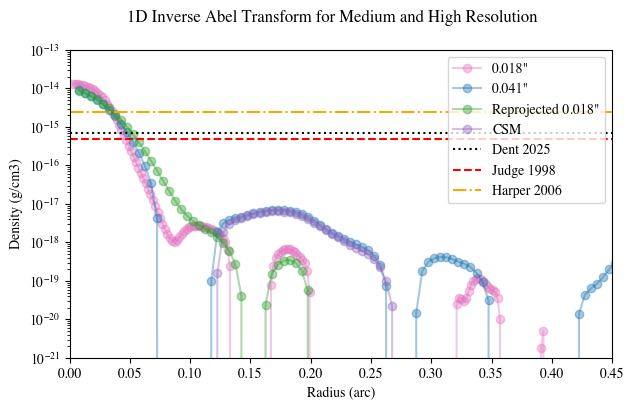

In [37]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "1D Inverse Abel Transform for Medium and High Resolution" ,dent = True)
#plt.legend()
plt.savefig('Documents/cuny_ms/csm_pipeline/thesis/medhigh/1d_abel_MH.png')


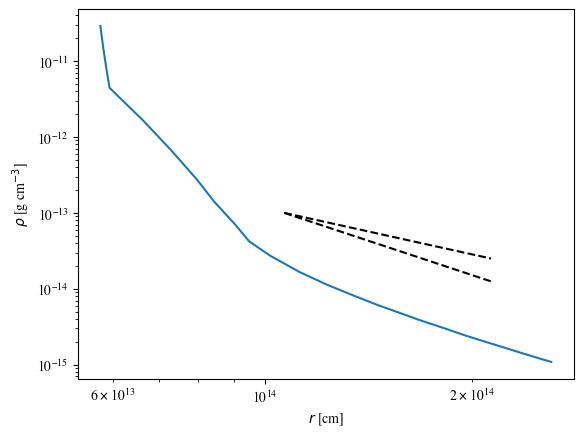

In [38]:
# H density from Dent et al via webplotdigitizer
data = np.asarray([[1.0801033591731268, 13.018018018018019],
[1.0904392764857884, 12.729729729729732],
[1.103359173126615, 12.423423423423424],
[1.1136950904392768, 12.202702702702704],
[1.245478036175711, 11.774774774774775],
[1.3695090439276487, 11.378378378378379],
[1.4935400516795867, 10.99099099099099],
[1.5813953488372094, 10.702702702702704],
[1.6950904392764858, 10.405405405405405],
[1.7777777777777781, 10.18018018018018],
[1.9069767441860466, 9.99099099099099],
[2.1059431524547803, 9.774774774774775],
[2.30749354005168, 9.608108108108109],
[2.524547803617571, 9.463963963963964],
[2.739018087855297, 9.337837837837839],
[2.9586563307493536, 9.22972972972973],
[3.152454780361757, 9.13963963963964],
[3.4263565891472867, 9.031531531531531],
[3.648578811369509, 8.945945945945946],
[3.8656330749354, 8.873873873873872],
[4.118863049095607, 8.797297297297298],
[4.3824289405684755, 8.72072072072072],
[4.671834625322997, 8.644144144144143],
[4.89405684754522, 8.59009009009009],]).T

# pN = mr.MesaData()

RSUN = 6.98e10 #solar radius
fig, ax = plt.subplots()
scale = 764*RSUN #r_betelgeuse is 764 times the radius of thye sun
xaxis = data[0]*scale
yaxis = 10**data[1] * 1.6735575e-24 * (1/0.6)
ax.plot([2*scale,4*scale], [1e-13, 1e-13/4], linestyle='dashed', color='k')
ax.plot([2*scale,4*scale], [1e-13, 1e-13/8], linestyle='dashed', color='k')
ax.plot(xaxis, yaxis)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r$ [cm]')
ax.set_ylabel(r'$\rho$ [g cm$^{-3}$]')
plt.show()

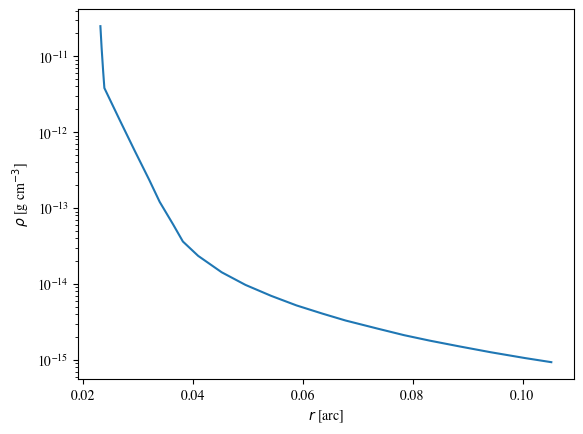

In [39]:
# H density from Dent et al via webplotdigitizer
data = np.asarray([[1.0801033591731268, 13.018018018018019],
[1.0904392764857884, 12.729729729729732],
[1.103359173126615, 12.423423423423424],
[1.1136950904392768, 12.202702702702704],
[1.245478036175711, 11.774774774774775],
[1.3695090439276487, 11.378378378378379],
[1.4935400516795867, 10.99099099099099],
[1.5813953488372094, 10.702702702702704],
[1.6950904392764858, 10.405405405405405],
[1.7777777777777781, 10.18018018018018],
[1.9069767441860466, 9.99099099099099],
[2.1059431524547803, 9.774774774774775],
[2.30749354005168, 9.608108108108109],
[2.524547803617571, 9.463963963963964],
[2.739018087855297, 9.337837837837839],
[2.9586563307493536, 9.22972972972973],
[3.152454780361757, 9.13963963963964],
[3.4263565891472867, 9.031531531531531],
[3.648578811369509, 8.945945945945946],
[3.8656330749354, 8.873873873873872],
[4.118863049095607, 8.797297297297298],
[4.3824289405684755, 8.72072072072072],
[4.671834625322997, 8.644144144144143],
[4.89405684754522, 8.59009009009009],]).T

# pN = mr.MesaData()

fig, ax = plt.subplots()
xaxis = data[0]*21.5/1000
yaxis = 10**data[1] * 1.6735575e-24 * (1/0.7)
# ax.plot([2*scale,4*scale], [1e-13, 1e-13/4], linestyle='dashed', color='k')
# ax.plot([2*scale,4*scale], [1e-13, 1e-13/8], linestyle='dashed', color='k')
ax.plot(xaxis, yaxis)
# ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r'$r$ [arc]')
ax.set_ylabel(r'$\rho$ [g cm$^{-3}$]')
plt.show()

In [ ]:
def plot_1d_abel_distribution(data_abel_1d,info,radius,ax_ymin=1e-2, ax_ymax=1e4,xmin=0,xmax=0.45, suptitle = "1D Abel Transformation (g/cm3)", dent=False):
    '''
    plot 1d density and intensity functions.
    can select plot x and y limits. default values inputted otherwise
    '''
    lowcolor = 'steelblue'
    highcolor='crimson'


    plt.rcParams["font.family"] = "times"
    fig, ax = plt.subplots(1, 1, figsize = [7,4])
    fig.suptitle(suptitle)

    title = ['hr','lr','reproj','csm']
    labels = ['{res}"'.format(res = np.round(info['hr']['kspatres'],3)),
             '{res}"'.format(res = np.round(info['lr']['kspatres'],3)),
               'Reprojected {res}"'.format(res = np.round(info['hr']['kspatres'],3)),
                 "CSM"]    
    
    color = ['C6','C0','C2','C4']

    for j in range(len(title)):
        print(len(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])]))
        print((data_abel_1d[title[j]]*430).shape)
        ax.fill_between(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])],data_abel_1d[title[j]]+data_abel_1d[title[j]]*430,data_abel_1d[title[j]]+data_abel_1d[title[j]]*1000,alpha=0.4, label = labels[j], color = color[j])
        #ax.plot(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])],data_abel_1d[title[j]]*200,'o-',alpha=0.4, label = labels[j], c = color[j])
            #ax.errorbar(radius[title[c]]['arc_1d'],data_1d[title[c]].value,yerr=info[title[c]]['error'].value, c = color[c])

    

    if(dent == True):
         plt.plot(xaxis,yaxis, label = ("Dent 2024"),color = 'black')



    ax.legend(loc = 'best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ax_ymin, ax_ymax)

    ax.semilogy()
#     ax.set_title("1-D Density (g/cm3)")
    ax.set_xlabel('Radius (arc)')
    ax.set_ylabel('Density (g/cm3)')


In [321]:
np.trapz(np.sum(yaxis) * (4/3)* np.pi *xaxis, xaxis)

1.1123886447669348e-12

198
(198,)
198
(198,)
55
(55,)
55
(55,)


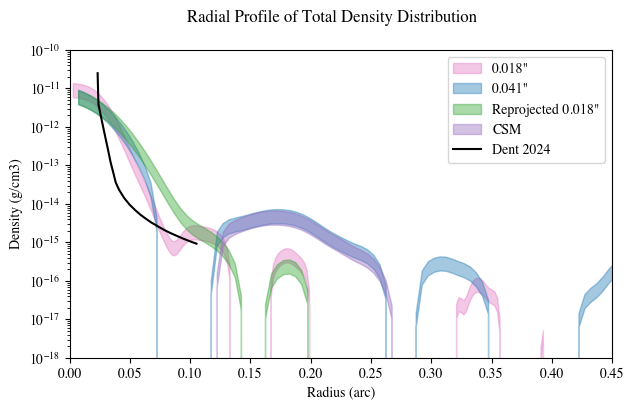

In [322]:
plot_1d_abel_distribution(abels,info3,radius3,ax_ymin=1e-18,ax_ymax=1e-10, suptitle = "Radial Profile of Total Density Distribution" ,dent = True)
#plt.legend()
plt.savefig('Documents/cuny_ms/csm_pipeline/thesis/medhigh/1d_abel_MH_DENT.png')


In [43]:
def plot_1d_abel_distribution_rstar(data_abel_1d,info,radius,ax_ymin=1e-2, ax_ymax=1e4,xmin=0,xmax=13, suptitle = "1D Abel Transformation (g/cm3)", dent=False):
    '''
    plot 1d density and intensity functions.
    can select plot x and y limits. default values inputted otherwise
    '''


    plt.rcParams["font.family"] = "times"
    fig, ax = plt.subplots(1, 1, figsize = [7,4])
    fig.suptitle(suptitle)

    title = ['hr','lr','reproj','csm']
    labels = ['{res}"'.format(res = np.round(info['hr']['kspatres'],3)),
             '{res}"'.format(res = np.round(info['lr']['kspatres'],3)),
               'Reprojected {res}"'.format(res = np.round(info['hr']['kspatres'],3)),
                 "CSM"]    
    
    color = ['C6','C0','C2','C4']

    for j in range(len(title)):
        print(len(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])]))
        print((data_abel_1d[title[j]]*430).shape)
        ax.fill_between(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])]/0.0295,data_abel_1d[title[j]]+data_abel_1d[title[j]]*430,data_abel_1d[title[j]]+data_abel_1d[title[j]]*1000,alpha=0.4, label = labels[j], color = color[j])
        #ax.plot(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])],data_abel_1d[title[j]]*200,'o-',alpha=0.4, label = labels[j], c = color[j])
            #ax.errorbar(radius[title[c]]['arc_1d'],data_1d[title[c]].value,yerr=info[title[c]]['error'].value, c = color[c])

    

    if(dent == True):
         plt.plot(xaxis/0.0215,yaxis, label = ("Dent et al 2025"),color = 'black')


    ax.axvline(x=1, c = 'red', label = 'R_star = 1', ls = 'dashed')

    ax.legend(loc = 'best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
    ax.set_xlim(xmin,xmax)
    #ax.set_xlim(0,0.45)
    ax.set_ylim(ax_ymin, ax_ymax)
    ax.set_ylim(ax_ymin, ax_ymax)

    ax.semilogy()
#     ax.set_title("1-D Density (g/cm3)")
    ax.set_xlabel(r'Radius [$R_{*}$]')
    ax.set_ylabel(r'Density [g cm$^{-3}$]')


198
(198,)
198
(198,)
55
(55,)
55
(55,)


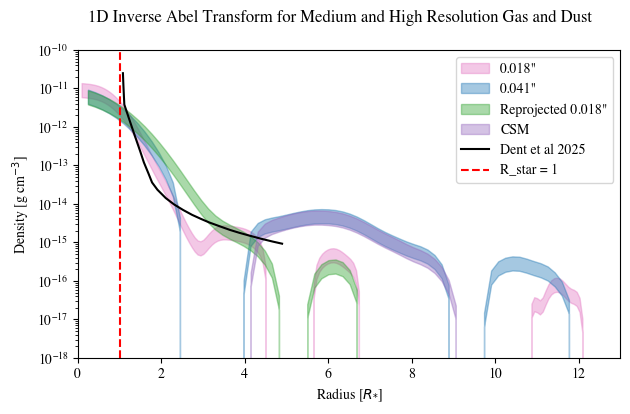

In [44]:
plot_1d_abel_distribution_rstar(abels,info3,radius3,ax_ymin=1e-18,ax_ymax=1e-10, suptitle = "1D Inverse Abel Transform for Medium and High Resolution Gas and Dust" ,dent = True)


In [45]:
def find_nearest(array, value):
    #array = np.asarray(array)
    diff = np.abs(array - value)
    indx= np.where(diff==np.nanmin(diff))
    return np.asarray(indx)[0][0]

In [46]:
a = np.array([1,2,3,4,5,1,6,1]) 
ins = np.where(a == np.nanmin(a))

In [47]:
np.asarray(ins)[0][0]

0

In [48]:
radius3['csm']['arc_1d'][54]

<Quantity 0.2775 arcsec>

In [49]:
abels['csm']

array([-5.79805367e-18, -5.83822643e-18, -5.89562965e-18, -5.97150397e-18,
       -6.06756813e-18, -6.18613187e-18, -6.33026179e-18, -6.50402600e-18,
       -6.71286158e-18, -6.96414125e-18, -7.26807905e-18, -7.63924643e-18,
       -8.09926573e-18, -8.68198674e-18, -9.44457723e-18, -1.04954652e-17,
       -1.20873758e-17, -1.39203032e-17, -1.39474292e-17, -1.12138670e-17,
       -7.65562514e-18, -4.60855961e-18, -2.01924029e-18,  1.59384806e-19,
        1.84799296e-18,  2.99308276e-18,  3.73453768e-18,  4.32753030e-18,
        4.92197277e-18,  5.48912221e-18,  5.97103193e-18,  6.34412481e-18,
        6.54435178e-18,  6.53836518e-18,  6.36773572e-18,  6.03728299e-18,
        5.51876279e-18,  4.83659348e-18,  4.06692567e-18,  3.29936612e-18,
        2.61683097e-18,  2.06871302e-18,  1.66271304e-18,  1.35645435e-18,
        1.09877283e-18,  8.82447844e-19,  7.25201844e-19,  6.12711239e-19,
        4.96936149e-19,  3.63036484e-19,  2.24397291e-19,  1.02402194e-19,
        2.24960651e-20, -

In [50]:
info3['csm']['median_dens'].value

8.690526969990363e-05

In [51]:
starry = np.ones([data3['csm']['jy_arc2'].shape[0], data3['csm']['jy_arc2'].shape[1]])#*u.g/u.cm**3

for i in range(data3['csm']['jy_arc2'].shape[0]):
    for j in range(data3['csm']['jy_arc2'].shape[1]):
        r_i = radius3['csm']['arc_2d'][i,j]

        if r_i>.2275:
            starry[i,j] = info3['csm']['median_dens'].value

        else:
            indx = find_nearest(radius3['csm']['arc_1d'].value,r_i)
            starry[i,j] = abels['csm'][indx]


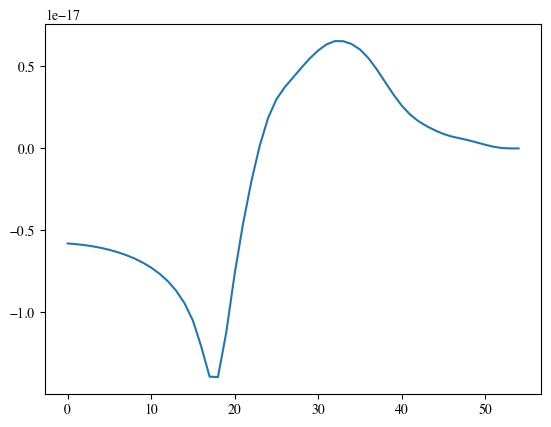

In [52]:
plt.plot(abels['csm'])

(400.0, 600.0)

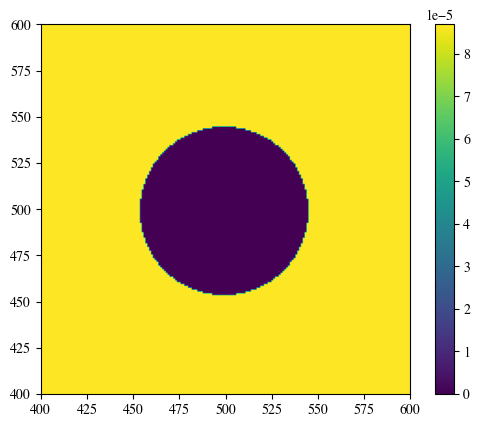

In [53]:
plt.imshow(starry)
plt.colorbar()
plt.xlim(400,600)
plt.ylim(400,600)

In [54]:
radius3['csm']['arc_1d'][15:]

<Quantity [0.0825, 0.0875, 0.0925, 0.0975, 0.1025, 0.1075, 0.1125, 0.1175,
           0.1225, 0.1275, 0.1325, 0.1375, 0.1425, 0.1475, 0.1525, 0.1575,
           0.1625, 0.1675, 0.1725, 0.1775, 0.1825, 0.1875, 0.1925, 0.1975,
           0.2025, 0.2075, 0.2125, 0.2175, 0.2225, 0.2275, 0.2325, 0.2375,
           0.2425, 0.2475, 0.2525, 0.2575, 0.2625, 0.2675, 0.2725, 0.2775,
           0.2825, 0.2875, 0.2925, 0.2975, 0.3025, 0.3075, 0.3125, 0.3175,
           0.3225, 0.3275, 0.3325, 0.3375, 0.3425, 0.3475, 0.3525, 0.3575,
           0.3625, 0.3675, 0.3725, 0.3775, 0.3825, 0.3875, 0.3925, 0.3975,
           0.4025, 0.4075, 0.4125, 0.4175, 0.4225, 0.4275, 0.4325, 0.4375,
           0.4425, 0.4475, 0.4525, 0.4575, 0.4625, 0.4675, 0.4725, 0.4775,
           0.4825, 0.4875, 0.4925, 0.4975, 0.5025, 0.5075, 0.5125, 0.5175,
           0.5225, 0.5275, 0.5325, 0.5375, 0.5425, 0.5475, 0.5525, 0.5575,
           0.5625, 0.5675, 0.5725, 0.5775, 0.5825, 0.5875, 0.5925, 0.5975,
           0.6025, 0.6075

In [55]:
np.sum(abels['csm'][15:][abels['csm'][15:]>0])*(4*np.pi*(6.171e13)**3) / 1.989e33

1.3545201665825714e-07

In [56]:
np.sum(abels['hr'][15:][abels['hr'][15:]>0])*(4*np.pi*(6.171e13)**3) / 1.989e33

2.0314706809556195e-05

In [57]:
def plot12d(data,info, suptitle,vminmax, minn=-.4):
    maxx= -minn

    figure,ax = plt.subplots(nrows = 1, ncols=1, figsize = (5,4))#, subplot_kw={'projection': wcs})
    figure.suptitle(suptitle, fontsize = 18, y=1.01)

    xaxis = range(data.shape[0])*info['pix_size_arcsec']-((info['position'][0])*info['pix_size_arcsec'])
    yaxis = range(data.shape[1])*info['pix_size_arcsec']-((info['position'][1])*info['pix_size_arcsec'])


    im = ax.pcolormesh(yaxis*1000,xaxis*1000,data*1000, cmap='gist_heat',shading="gouraud", vmin = vminmax[0], vmax = vminmax[1])
    ax.plot((info['position'][1])*info['pix_size_arcsec']-((info['position'][1])*info['pix_size_arcsec']),
            (info['position'][0])*info['pix_size_arcsec']-((info['position'][0])*info['pix_size_arcsec']),'rx')
    ax.plot(0,0,'rx')

    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

    X,Y = np.meshgrid(yaxis, xaxis)
    #contour_levels = np.linspace(np.min(data), np.max(data), 8)
    levels = [1,10,50,70,75]

    cont = ax.contour(X*1000,Y*1000, data*1000,levels =levels,colors= ('whitesmoke','whitesmoke', 'lightgray','grey','grey'),indexing = 'xy',
                      linewidths=.7)
    ax.clabel(cont, fontsize = 10)


    

    figure.colorbar(im,ax=ax, label='mJy/beam')
    ax.set_xlabel("Radius (mas)" , size = 14)
    ax.set_ylabel("Radius (mas)", size = 14)

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_57732/3902618861.py:23: UserWarning: The following kwargs were not used by contour: 'indexing'
  cont = ax.contour(X*1000,Y*1000, data*1000,levels =levels,colors= ('whitesmoke','whitesmoke', 'lightgray','grey','grey'),indexing = 'xy',


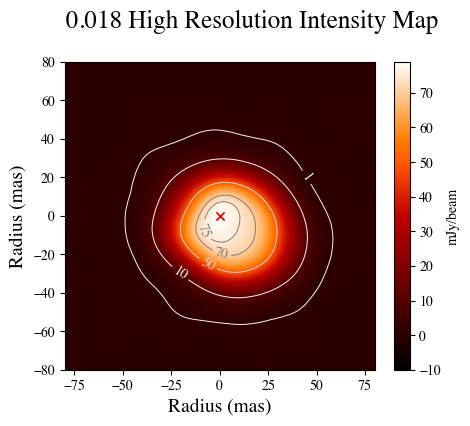

In [58]:
plot12d(data3['hr']['jy_beam'][0,0,...],info3['hr'],suptitle='0.018'' High Resolution Intensity Map', vminmax = [-10,79],minn=-80)

In [934]:
def plot12d2(data,info, suptitle,vminmax, minn=-.4):
    maxx= -minn

    figure,ax = plt.subplots(nrows = 1, ncols=1, figsize = (5,4))#, subplot_kw={'projection': wcs})
    figure.suptitle(suptitle, fontsize = 18, y=1.01)

    xaxis = range(data.shape[0])*info['pix_size_arcsec']-((info['position'][0])*info['pix_size_arcsec'])
    yaxis = range(data.shape[1])*info['pix_size_arcsec']-((info['position'][1])*info['pix_size_arcsec'])


    im = ax.pcolormesh(yaxis,xaxis,data, cmap='gist_heat',shading="gouraud", vmin = vminmax[0], vmax = vminmax[1])
#     ax.plot((info['position'][1])*info['pix_size_arcsec']-((info['position'][1])*info['pix_size_arcsec']),
#             (info['position'][0])*info['pix_size_arcsec']-((info['position'][0])*info['pix_size_arcsec']),'rx')
#     ax.plot(0,0,'rx')

    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)
#     plt.plot(476*info['pix_size_arcsec']-((info['position'][0])*info['pix_size_arcsec']),
#              509*info['pix_size_arcsec']-((info['position'][1])*info['pix_size_arcsec']),'bx')
#     print(476*info['pix_size_arcsec']-((info['position'][0])*info['pix_size_arcsec']),
#              509*info['pix_size_arcsec']-((info['position'][1])*info['pix_size_arcsec']))
    

    figure.colorbar(im,ax=ax, label=r'Jy arc$^{-2}$')
    ax.set_xlabel("Radius (arc)" , size = 14)
    ax.set_ylabel("Radius (arc)", size = 14)

In [935]:
np.nanmax(data3['csm']['jy_arc2'])

<Quantity 0.0176044>

In [936]:
data3['reproj']['jy_arc2'][0,0,...].shape

(1000, 1000)

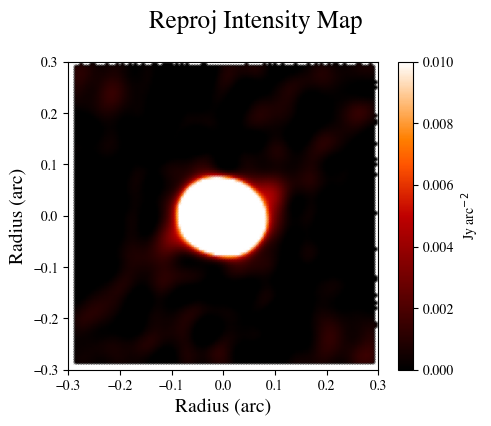

In [937]:
plot12d2(data3['reproj']['jy_arc2'][0,0,...],info3['reproj'],suptitle='Reproj Intensity Map', vminmax = [0,0.01],minn=-.3)

In [938]:
np.where(data3['lr']['jy_arc2'][0,0,...]==np.nanmax(data3['lr']['jy_arc2'][0,0,...]))

(array([499]), array([499]))

In [939]:
np.where(data3['reproj']['jy_arc2'][0,0,...]==np.nanmax(data3['reproj']['jy_arc2'][0,0,...]))

(array([499]), array([499]))

In [940]:
info3['lr']['kspatres']

0.040566339161841755

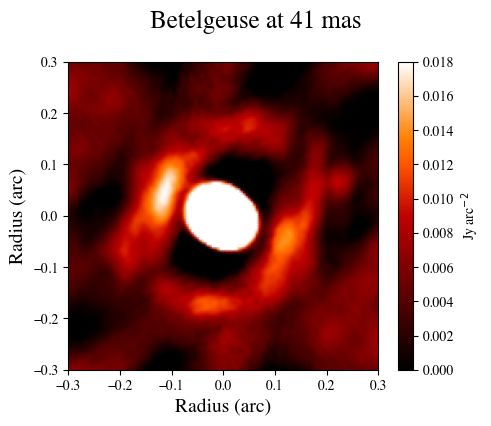

In [952]:
plot12d2(data3['lr']['jy_arc2'][0,0,...],info3['lr'],suptitle='Betelgeuse at 41 mas', vminmax = [0,.018],minn=-.3)

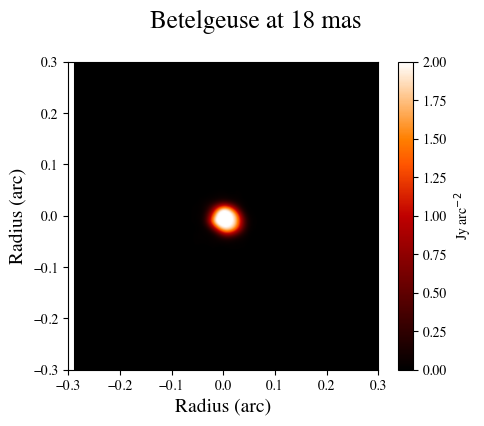

In [953]:
plot12d2(data3['hr']['jy_arc2'][0,0,...],info3['hr'],suptitle='Betelgeuse at 18 mas', vminmax = [0,2],minn=-.3)

-0.1150000000000091 arcsec 0.05000000000000426 arcsec


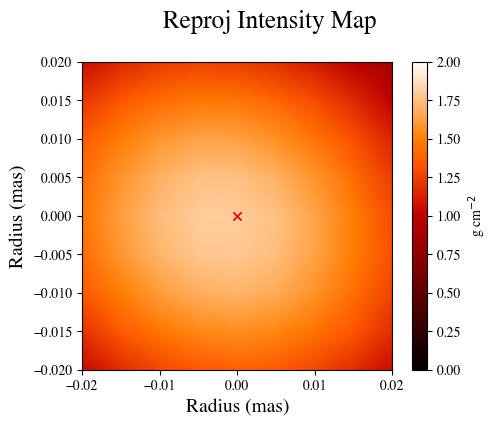

In [65]:
plot12d2(data3['reproj']['jy_arc2'][0,0,...],info3['reproj'],suptitle='Reproj Intensity Map', vminmax = [0,2],minn=-.02)

-0.1150000000000091 arcsec 0.05000000000000426 arcsec


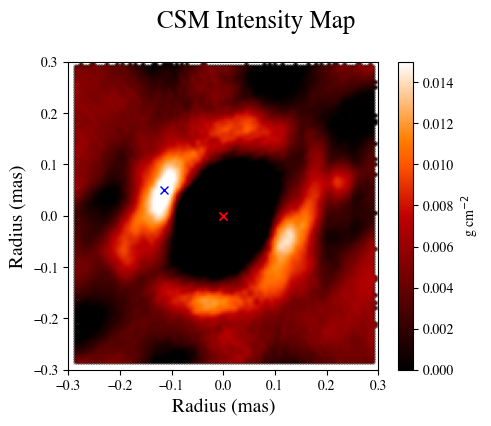

In [66]:
plot12d2(data3['csm']['jy_arc2'].value,info3['csm'],suptitle='CSM Intensity Map', vminmax = [0,.015],minn=-.3)

-0.1150000000000091 arcsec 0.05000000000000426 arcsec


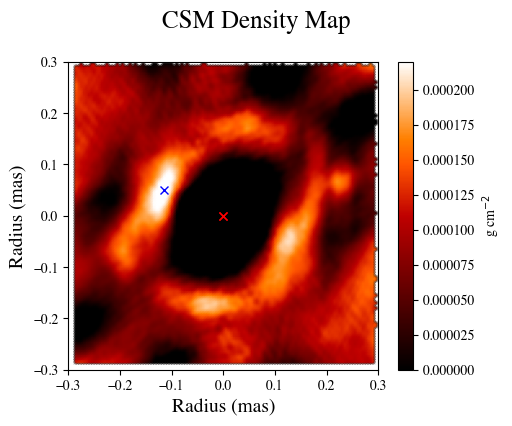

In [67]:
plot12d2(data_dens_2d3['csm'].value,info3['csm'],suptitle='CSM Density Map', vminmax = [0,.00022],minn=-.3)

In [965]:
def match2(data_hr, data_lr, info_hr, info_lr):
    '''
        data 1, data 2 in jy/pix, the info dictionaries
    '''

    data_jy_per_pixel_hr = data_hr['jy_pix']
    data_jy_per_pixel_lr = data_lr['jy_pix']

    # Convolution
    from astropy.convolution import convolve
    from astropy.convolution import Gaussian2DKernel

    from reproject import reproject_adaptive
    bmaj_pix = info_lr['bmaj']/(info_hr['pix_size'][0].value)
    bmin_pix = info_lr['bmin']/(info_hr['pix_size'][0].value)

    bmaj_sigma = bmaj_pix/(2*np.sqrt(2*np.log(2)))
    bmin_sigma = bmin_pix/(2*np.sqrt(2*np.log(2)))

    gaussian_2D_kernel = Gaussian2DKernel(x_stddev=bmaj_sigma, y_stddev=bmin_sigma, theta = info_lr['theta'], mode = 'oversample')
    #print(gaussian_2D_kernel.shape)

    plt.imshow(gaussian_2D_kernel)
    plt.title('Gaussian 2D Kernel')
    plt.ylim(-0.3,0.3)
    plt.xlim(-0.3,0.3)
    #, vminmax = [0,.00022],minn=-.3)
    
    # print("KERNEL SHAPE: ", gaussian_2D_kernel.shape)
    beam_solid_angle_hr = np.pi * info_hr['beam'][0] * info_hr['beam'][1] / (4*np.log(2))
    beam_solid_angle_lr = np.pi * info_lr['beam'][0] * info_lr['beam'][1] / (4*np.log(2))

    convolved_hr_pix = convolve(data_jy_per_pixel_hr[0,0], gaussian_2D_kernel) 
    conv_jy_arc2 =(convolved_hr_pix /beam_solid_angle_lr.to(u.arcsec**2).value)

    



    # print("beam_solid_angle_hr", beam_solid_angle_hr)
    # print("beam_solid_angle_lr", beam_solid_angle_lr)

    from astropy.wcs import WCS
    wcs_hr = WCS(info_hr['header'])
    wcs_lr = WCS(info_lr['header'])
    # print("starting reprojection...")

    #reproj_hr_pix, footprint = reproject_exact((convolved_hr_pix[np.newaxis,np.newaxis], wcs_hr.celestial), wcs_lr.celestial)
    reproj_hr_pix, footprint = reproject_adaptive((convolved_hr_pix[np.newaxis,np.newaxis], wcs_hr.celestial), wcs_lr.celestial,
                                conserve_flux=True)#, shape_out = convolved_hr_pix.shape)
    
    #plot12d2(reproj_hr_pix, info3['lr'],suptitle='Repojected Convolved 18 mas Data', vminmax = [0,.00022],minn=-.3)


    # print("reprojection complete.")

    # print("convolved_hr_pix[np.newaxis,np.newaxis]: ", convolved_hr_pix[np.newaxis,np.newaxis].shape)

    # print("REPROJ SHAPE: ", reproj_hr_pix.shape)

    reproj_hr_jy_arc2 =(reproj_hr_pix /beam_solid_angle_lr.to(u.arcsec**2).value)

    reproj_hr_pixel_norm = reproj_hr_pix*np.nanmax(data_jy_per_pixel_lr[0,0])/np.nanmax(reproj_hr_pix) #normalizing
    #reproj_hr_jy_arc2_norm =(reproj_hr_pixel_norm /beam_solid_angle_lr.to(u.arcsec**2).value)
    reproj_hr_jy_arc2_norm = reproj_hr_jy_arc2*np.nanmax(data_lr['jy_arc2'][0,0])/np.nanmax(reproj_hr_jy_arc2)

    max_pos = np.unravel_index(np.argmax(np.ma.masked_invalid(reproj_hr_pixel_norm[0,0,...])), reproj_hr_pixel_norm.shape)
    y = max_pos[-1]
    x = max_pos[-2]

    position_conv = (x,y)

    from astropy.stats import sigma_clipped_stats
    from photutils.detection import DAOStarFinder
    ### GATHERING MEDIAN BACKGROUND DATA
    mean_cv, median_cv, std_cv = sigma_clipped_stats(reproj_hr_pixel_norm[0,0,...], sigma = 3.0)
    # print("Mean, meadian, std: ", mean, median, std)

    daofind = DAOStarFinder(fwhm = 3.0, threshold = 5*std_cv.value)

    data_reproj = {"jy_arc2": reproj_hr_jy_arc2, "jy_pix": reproj_hr_pix, "jy_pix_norm": reproj_hr_pixel_norm,
              "jy_arc2_norm": reproj_hr_jy_arc2_norm}
    info_reproj = {"position": position_conv, "median": median_cv, "pix_size_arcsec": info_lr['pix_size_arcsec']}

    return gaussian_2D_kernel, conv_jy_arc2, reproj_hr_jy_arc2, reproj_hr_jy_arc2_norm

    #return data_reproj, info_reproj


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

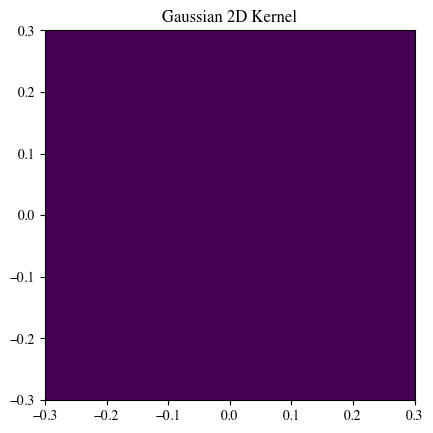

In [966]:
gaussian_2D_kernel, conv_jy_arc2, reproj_hr_jy_arc2, reproj_hr_jy_arc2_norm = match2(data3['hr'], data3['lr'],info3['hr'], info3['lr'])

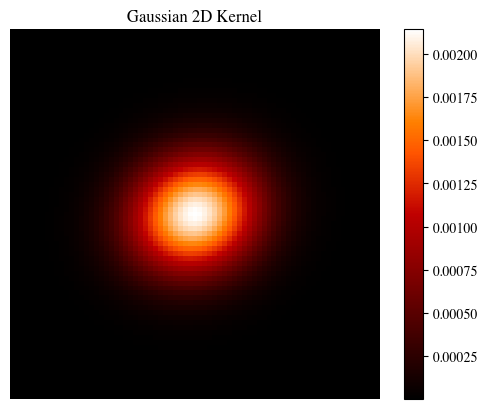

In [1019]:
plt.imshow(gaussian_2D_kernel, cmap='gist_heat')
plt.title("Gaussian 2D Kernel")
plt.axis('off')
plt.colorbar()

(1000,) (1000,) (1, 1, 1000, 1000)


Text(0.5, 1.0, 'Normalized Reprojected 0.018" Data')

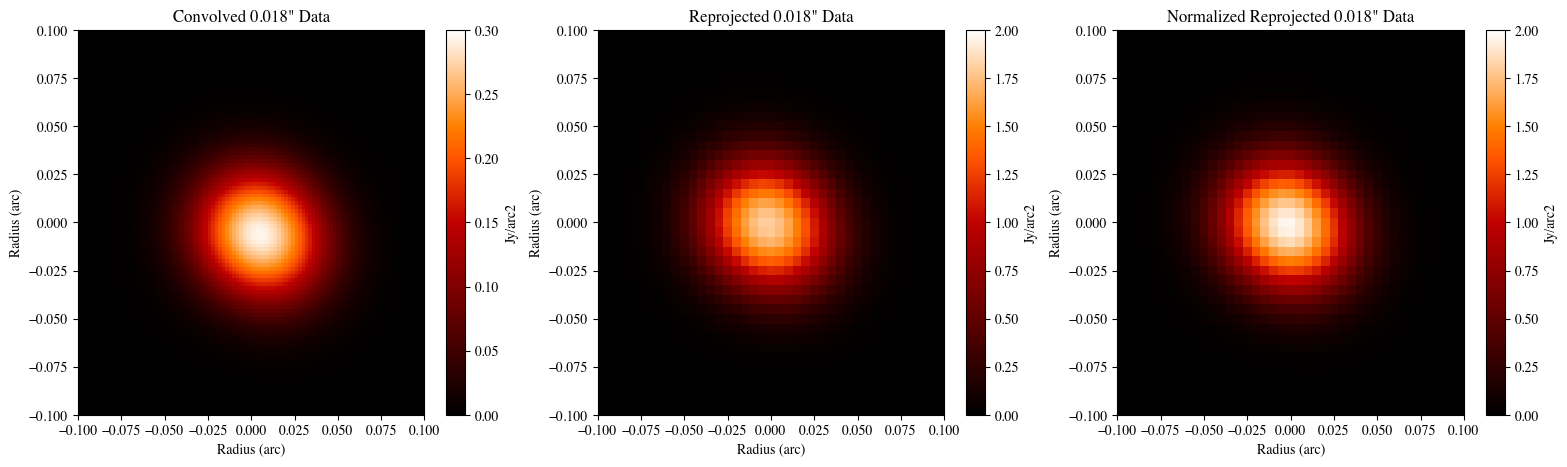

In [1018]:
fig, (ax2, ax3,ax4) = plt.subplots(1,3, figsize = (19,5))

xaxis_hr = range(conv_jy_arc2.shape[0])*info3['hr']['pix_size_arcsec']-((info3['hr']['position'][0])*info3['hr']['pix_size_arcsec'])
yaxis_hr = range(conv_jy_arc2.shape[1])*info3['hr']['pix_size_arcsec']-((info3['hr']['position'][1])*info3['hr']['pix_size_arcsec'])

im = ax2.pcolormesh(yaxis_hr,xaxis_hr,conv_jy_arc2, cmap='gist_heat',vmin =0,vmax = 0.3)
minn = -0.1
maxx = -1*minn
ax2.set_xlim(minn, maxx)
ax2.set_ylim(minn, maxx)

ax2.set_title('Convolved 0.018" Data')
fig.colorbar(im,ax=ax2, label='Jy/arc2')
ax2.set_xlabel("Radius (arc)" , size = 10)
ax2.set_ylabel("Radius (arc)" , size = 10)


#ax3
xaxis_lr = range(reproj_hr_jy_arc2.shape[-1])*info3['lr']['pix_size_arcsec']-((info3['lr']['position'][0])*info3['lr']['pix_size_arcsec'])
yaxis_lr = range(reproj_hr_jy_arc2.shape[-2])*info3['lr']['pix_size_arcsec']-((info3['lr']['position'][1])*info3['lr']['pix_size_arcsec'])

print(xaxis_lr.shape, yaxis_lr.shape, reproj_hr_jy_arc2.shape)

im = ax3.pcolormesh(yaxis_lr,xaxis_lr,reproj_hr_jy_arc2[0,0,...], cmap='gist_heat',vmin = 0, vmax = 2)

ax3.set_xlim(minn, maxx)
ax3.set_ylim(minn, maxx)


fig.colorbar(im,ax=ax3, label='Jy/arc2')
ax3.set_xlabel("Radius (arc)" , size = 10)
ax3.set_ylabel("Radius (arc)" , size = 10)
ax3.set_title('Reprojected 0.018" Data')

#ax4
im = ax4.pcolormesh(yaxis_lr,xaxis_lr,reproj_hr_jy_arc2_norm[0,0,...], cmap='gist_heat', vmin = 0, vmax =2)

ax4.set_xlim(minn, maxx)
ax4.set_ylim(minn, maxx)


fig.colorbar(im,ax=ax4, label='Jy/arc2')
ax4.set_xlabel("Radius (arc)" , size = 10)
ax4.set_ylabel("Radius (arc)" , size = 10)
ax4.set_title('Normalized Reprojected 0.018" Data')



In [1008]:
np.nanmax(reproj_hr_jy_arc2)

1.804617621985224

In [1009]:
np.nanmax(reproj_hr_jy_arc2_norm)

<Quantity 1.96219242>

In [1005]:
np.nanmax(data_dens_2d3['csm'])

<Quantity 0.00024578 g / cm2>

In [69]:
np.where(data_dens_2d3['csm']==np.nanmax(data_dens_2d3['csm']))

(array([509]), array([476]))

In [70]:
import pandas as pd

In [71]:
csm_df = pd.DataFrame(data = {'radius (R_*)': radius3['csm']['arc_1d'][:len(abels['csm'])]/(0.0295),
                              'radius (arc)': radius3['csm']['arc_1d'][:len(abels['csm'])],
                              'radius (pc)': radius3['csm']['pc_1d'][:len(abels['csm'])],
                              'radius (m)': radius3['csm']['pc_1d'][:len(abels['csm'])].to(u.m),
                              'radius (cm)': radius3['csm']['pc_1d'][:len(abels['csm'])].to(u.cm),
                              'rho (g cm-1)': abels['csm'],
                              'rho_tot lower bound': abels['csm']*450,
                              'rho_tot upper bound': abels['csm']*1000})

In [72]:
168*u.pc.to(u.m)

5.183938336905497e+18

In [73]:
csm_df_positive = csm_df.loc[csm_df['rho (g cm-1)']>0]

In [74]:
csm_df['radius (R_*)'][0]-csm_df['radius (R_*)'][1]

-0.16949152542374235

In [75]:
csm_df_positive.head(10)

,radius (R_*),radius (arc),radius (pc),radius (m),radius (cm),rho (g cm-1),rho_tot lower bound,rho_tot upper bound
23,4.152542,0.1225,0.000100,3.078721e+12,3.078721e+14,1.593848e-19,7.172316e-17,1.593848e-16
24,4.322034,0.1275,0.000104,3.204383e+12,3.204383e+14,1.847993e-18,8.315968e-16,1.847993e-15
25,4.491525,0.1325,0.000108,3.330045e+12,3.330045e+14,2.993083e-18,1.346887e-15,2.993083e-15
26,4.661017,0.1375,0.000112,3.455708e+12,3.455708e+14,3.734538e-18,1.680542e-15,3.734538e-15
27,4.830508,0.1425,0.000116,3.581370e+12,3.581370e+14,4.327530e-18,1.947389e-15,4.327530e-15
28,5.000000,0.1475,0.000120,3.707032e+12,3.707032e+14,4.921973e-18,2.214888e-15,4.921973e-15
29,5.169492,0.1525,0.000124,3.832694e+12,3.832694e+14,5.489122e-18,2.470105e-15,5.489122e-15
30,5.338983,0.1575,0.000128,3.958356e+12,3.958356e+14,5.971032e-18,2.686964e-15,5.971032e-15
31,5.508475,0.1625,0.000132,4.084018e+12,4.084018e+14,6.344125e-18,2.854856e-15,6.344125e-15
32,5.677966,0.1675,0.000136,4.209680e+12,4.209680e+14,6.544352e-18,2.944958e-15,6.544352e-15


In [76]:
np.asarray(csm_df_positive['radius (m)'])

array([3.07872129e+12, 3.20438338e+12, 3.33004547e+12, 3.45570757e+12,
       3.58136966e+12, 3.70703175e+12, 3.83269385e+12, 3.95835594e+12,
       4.08401803e+12, 4.20968013e+12, 4.33534222e+12, 4.46100431e+12,
       4.58666641e+12, 4.71232850e+12, 4.83799059e+12, 4.96365269e+12,
       5.08931478e+12, 5.21497687e+12, 5.34063897e+12, 5.46630106e+12,
       5.59196315e+12, 5.71762525e+12, 5.84328734e+12, 5.96894943e+12,
       6.09461153e+12, 6.22027362e+12, 6.34593571e+12, 6.47159781e+12,
       6.59725990e+12, 6.72292199e+12])

In [77]:
csm_dust_mass = np.trapz(np.asarray(csm_df_positive['rho (g cm-1)']*(4*csm_df_positive['radius (cm)']**2*np.pi), csm_df_positive['radius (cm)']))
csm_dust_mass

226170332662763.0

In [78]:
csm_mass_low = np.trapz(np.asarray(csm_df_positive['rho_tot lower bound']*(4*csm_df_positive['radius (cm)']**2*np.pi), csm_df_positive['radius (cm)']))
print(csm_mass_low)

1.0177664969824331e+17


In [79]:
csm_mass_high = np.trapz(np.asarray(csm_df_positive['rho_tot upper bound']*(4*csm_df_positive['radius (cm)']**2*np.pi), csm_df_positive['radius (cm)']))
csm_mass_high

2.2617033266276294e+17

In [80]:
info3['lr']['pix_size_arcsec']

<Quantity 0.005 arcsec>

In [81]:
print(csm_mass_low/1.99e33, "-", csm_mass_high/1.99e33)

5.114404507449413e-17 - 1.1365343349887585e-16


In [82]:
np.sqrt((-0.1150000000000091)**2 +0.05000000000000426**2)

0.12539936203985458

In [83]:
pix_size_pc_hr = sm(168, info3['hr']['pix_size_arcsec'].value)

In [84]:
dist_m = 168*u.pc.to(u.m)
dist_m

5.183938336905497e+18

In [85]:
S_hr = data_1d3['hr']*(info3['hr']['pix_size_arcsec'].value)/pix_size_pc_hr
m_hr = radius3['hr']['pc_1d'][:len(abels['hr'])].to(u.m)
B_hr = np.trapz(S_hr*np.pi*m_hr**2,m_hr)*3600
L_hr = B_hr*4*np.pi*dist_m

In [86]:
hr_df = pd.DataFrame(data = { 'radius (arc)': radius3['hr']['arc_1d'][:len(abels['hr'])],
                             'radius (R_*)': radius3['hr']['arc_1d'][:len(abels['hr'])]/(0.0295),
                              'radius (pc)': radius3['hr']['pc_1d'][:len(abels['hr'])],
                              'radius (m)': radius3['hr']['pc_1d'][:len(abels['hr'])].to(u.m),
                              'radius (cm)': radius3['hr']['pc_1d'][:len(abels['hr'])].to(u.cm),
                              'rho (g cm-1)': abels['hr'],                              
                              'rho_tot lower bound': abels['hr']*450,
                              'rho_tot upper bound': abels['hr']*1000,
                              'S (Jy arc-2)': data_1d3['hr'],
                              'S (Jy m-2)': S_hr,
                              'B (W m-1)': B_hr,
                              'L (W)': L_hr,
                              'L (L_\odot)': L_hr/ 3.827e26})

In [87]:
pd.set_option('display.max_rows', None)


In [88]:
hr_df.head(14)

,radius (arc),radius (R_*),radius (pc),radius (m),radius (cm),rho (g cm-1),rho_tot lower bound,rho_tot upper bound,S (Jy arc-2),S (Jy m-2),B (W m-1),L (W),L (L_\odot)
0,0.003,0.101695,0.000002,7.539726e+10,7.539726e+12,1.336088e-14,6.012397e-12,1.336088e-11,2.196326,2696.577941,5.251227e+42,3.420822e+62,8.938651e+35
1,0.005,0.169492,0.000004,1.256621e+11,1.256621e+13,1.316639e-14,5.924877e-12,1.316639e-11,2.176119,2671.769100,5.251227e+42,3.420822e+62,8.938651e+35
2,0.007,0.237288,0.000006,1.759269e+11,1.759269e+13,1.294834e-14,5.826752e-12,1.294834e-11,2.144189,2632.566024,5.251227e+42,3.420822e+62,8.938651e+35
3,0.009,0.305085,0.000007,2.261918e+11,2.261918e+13,1.267278e-14,5.702749e-12,1.267278e-11,2.098924,2576.991321,5.251227e+42,3.420822e+62,8.938651e+35
4,0.011,0.372881,0.000009,2.764566e+11,2.764566e+13,1.231024e-14,5.539608e-12,1.231024e-11,2.038536,2502.849424,5.251227e+42,3.420822e+62,8.938651e+35
5,0.013,0.440678,0.000011,3.267214e+11,3.267214e+13,1.183796e-14,5.327081e-12,1.183796e-11,1.961449,2408.203809,5.251227e+42,3.420822e+62,8.938651e+35
6,0.015,0.508475,0.000012,3.769863e+11,3.769863e+13,1.124276e-14,5.059240e-12,1.124276e-11,1.866745,2291.929321,5.251227e+42,3.420822e+62,8.938651e+35
7,0.017,0.576271,0.000014,4.272511e+11,4.272511e+13,1.052385e-14,4.735733e-12,1.052385e-11,1.754504,2154.123823,5.251227e+42,3.420822e+62,8.938651e+35
8,0.019,0.644068,0.000015,4.775160e+11,4.775160e+13,9.693636e-15,4.362136e-12,9.693636e-12,1.626167,1996.555624,5.251227e+42,3.420822e+62,8.938651e+35
9,0.021,0.711864,0.000017,5.277808e+11,5.277808e+13,8.775957e-15,3.949181e-12,8.775957e-12,1.484507,1822.630509,5.251227e+42,3.420822e+62,8.938651e+35


In [89]:
hr_df_positive = hr_df.iloc[0:13,:]

In [90]:
hr_df_positive

,radius (arc),radius (R_*),radius (pc),radius (m),radius (cm),rho (g cm-1),rho_tot lower bound,rho_tot upper bound,S (Jy arc-2),S (Jy m-2),B (W m-1),L (W),L (L_\odot)
0,0.003,0.101695,0.000002,7.539726e+10,7.539726e+12,1.336088e-14,6.012397e-12,1.336088e-11,2.196326,2696.577941,5.251227e+42,3.420822e+62,8.938651e+35
1,0.005,0.169492,0.000004,1.256621e+11,1.256621e+13,1.316639e-14,5.924877e-12,1.316639e-11,2.176119,2671.769100,5.251227e+42,3.420822e+62,8.938651e+35
2,0.007,0.237288,0.000006,1.759269e+11,1.759269e+13,1.294834e-14,5.826752e-12,1.294834e-11,2.144189,2632.566024,5.251227e+42,3.420822e+62,8.938651e+35
3,0.009,0.305085,0.000007,2.261918e+11,2.261918e+13,1.267278e-14,5.702749e-12,1.267278e-11,2.098924,2576.991321,5.251227e+42,3.420822e+62,8.938651e+35
4,0.011,0.372881,0.000009,2.764566e+11,2.764566e+13,1.231024e-14,5.539608e-12,1.231024e-11,2.038536,2502.849424,5.251227e+42,3.420822e+62,8.938651e+35
5,0.013,0.440678,0.000011,3.267214e+11,3.267214e+13,1.183796e-14,5.327081e-12,1.183796e-11,1.961449,2408.203809,5.251227e+42,3.420822e+62,8.938651e+35
6,0.015,0.508475,0.000012,3.769863e+11,3.769863e+13,1.124276e-14,5.059240e-12,1.124276e-11,1.866745,2291.929321,5.251227e+42,3.420822e+62,8.938651e+35
7,0.017,0.576271,0.000014,4.272511e+11,4.272511e+13,1.052385e-14,4.735733e-12,1.052385e-11,1.754504,2154.123823,5.251227e+42,3.420822e+62,8.938651e+35
8,0.019,0.644068,0.000015,4.775160e+11,4.775160e+13,9.693636e-15,4.362136e-12,9.693636e-12,1.626167,1996.555624,5.251227e+42,3.420822e+62,8.938651e+35
9,0.021,0.711864,0.000017,5.277808e+11,5.277808e+13,8.775957e-15,3.949181e-12,8.775957e-12,1.484507,1822.630509,5.251227e+42,3.420822e+62,8.938651e+35


In [91]:
hr_mass = np.trapz(np.asarray(hr_df_positive['rho (g cm-1)']*(4*hr_df_positive['radius (cm)']**3*np.pi)/3, hr_df_positive['radius (cm)']))
hr_mass

3.6841604156055867e+28

In [92]:
hr_mass/1.99e33

1.8513368922641138e-05

In [93]:
hr_mass_low = np.trapz(np.asarray(hr_df_positive['rho_tot lower bound']*(4*hr_df_positive['radius (cm)']**2*np.pi), hr_df_positive['radius (cm)']))
print(hr_mass_low)
hr_mass_high = np.trapz(np.asarray(hr_df_positive['rho_tot upper bound']*(4*hr_df_positive['radius (cm)']**2*np.pi), hr_df_positive['radius (cm)']))
print(hr_mass_high)

1.0354985642374706e+18
2.3011079205277125e+18


In [94]:
print(hr_mass_low/1.99e33, "-", hr_mass_high/1.99e33)

5.203510373052616e-16 - 1.156335638456137e-15


In [95]:
sum = 0

for i in range(len(hr_df_positive['radius (cm)'])):
    sum+= (4*np.pi/3) * hr_df_positive['radius (cm)'][i]**3 * np.asarray(hr_df_positive['rho_tot lower bound'])[i]

sum

1.830154380602457e+31

In [96]:
lr_df = pd.DataFrame(data = {'radius (R_*)': radius3['lr']['arc_1d'][:len(abels['lr'])]/(0.0295),
                              'radius (arc)': radius3['lr']['arc_1d'][:len(abels['lr'])],
                              'radius (pc)': radius3['lr']['pc_1d'][:len(abels['lr'])],
                              'radius (m)': radius3['lr']['pc_1d'][:len(abels['lr'])].to(u.m),
                              'radius (cm)': radius3['lr']['pc_1d'][:len(abels['lr'])].to(u.cm),
                              'rho (g cm-1)': abels['lr'],                              
                              'rho_tot lower bound': abels['lr']*450,
                              'rho_tot upper bound': abels['lr']*1000})

In [97]:
pd.set_option('display.max_rows', None)


In [98]:
lr_df_positive = lr_df.iloc[0:14,:]

In [99]:
lr_mass = np.trapz(np.asarray(lr_df_positive['rho (g cm-1)']*(4*lr_df_positive['radius (cm)']**2*np.pi), lr_df_positive['radius (cm)']))
lr_mass

1656628071912493.8

In [100]:
lr_mass/1.99e33

8.324764180464793e-19

In [101]:
lr_mass_low = np.trapz(np.asarray(lr_df_positive['rho_tot lower bound']*(4*lr_df_positive['radius (cm)']**2*np.pi), lr_df_positive['radius (cm)']))
print(lr_mass_low)
lr_mass_high = np.trapz(np.asarray(lr_df_positive['rho_tot upper bound']*(4*lr_df_positive['radius (cm)']**2*np.pi), lr_df_positive['radius (cm)']))
print(lr_mass_high)

7.454826323606221e+17
1.656628071912494e+18


In [102]:
print(lr_mass_low/1.99e33, "-", lr_mass_high/1.99e33)

3.746143881209156e-16 - 8.324764180464795e-16


In [103]:
#fits.writeto("Documents/csm_jy_arc2.fits", data3['csm']['jy_arc2'].value)

In [104]:
info3['lr']['pix_size_arcsec']

<Quantity 0.005 arcsec>

In [105]:
data3['csm']['jy_arc2'].shape

(1000, 1000)

Angles

In [106]:
angs = [45.63,57.26,37.96,49.88]

In [107]:
np.mean(angs)

47.6825

In [108]:
np.std(angs)

6.987440071299359

In [109]:
np.nanmax(data3['csm']['jy_arc2'])

<Quantity 0.0176044>

In [110]:
np.nanmax(data3['csm']['jy_pix'])*info3['lr']['pix/beam']*1000 #mJy/beam

<Quantity 2.44834892>

In [111]:
np.nanmax(data3['csm']['jy_arc2'])

<Quantity 0.0176044>

In [112]:
np.nanmax(data_dens_2d3['csm'])

<Quantity 0.00024578 g / cm2>

In [113]:
np.nanmax(data_dens_2d3['hr'])

<Quantity 0.011771 g / cm2>

In [114]:
info3['csm']['error_dens'].shape

(198,)

In [115]:
data_dens_1d3['csm'].shape

(198,)

In [116]:
above = data_dens_1d3['csm'].value>(3*info3['csm']['error_dens']).value

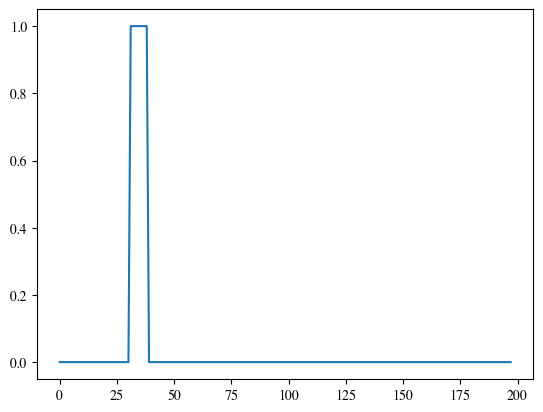

In [117]:
plt.plot(above)

In [118]:
above[38]

True

In [119]:
radius3['csm']['arc_1d'][30]-radius3['csm']['arc_1d'][29]

<Quantity 0.005 arcsec>

In [120]:
radius3['csm']['arc_1d'][30]

<Quantity 0.1575 arcsec>

In [121]:
radius3['csm']['arc_1d'][38]

<Quantity 0.1975 arcsec>

198
(198,)
198
(198,)
55
(55,)
55
(55,)


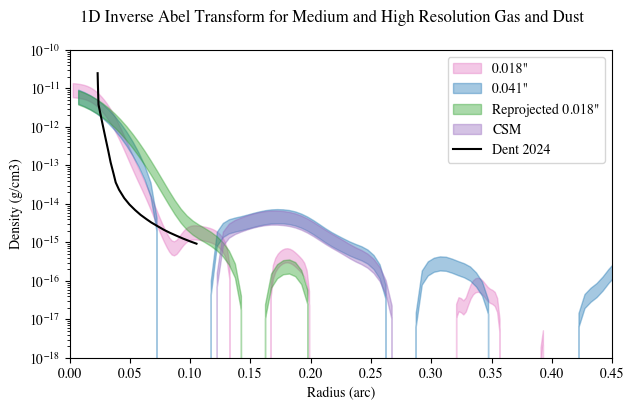

In [549]:
plot_1d_abel_distribution(abels,info3,radius3,ax_ymin=1e-18,ax_ymax=1e-10, suptitle = "1D Inverse Abel Transform for Medium and High Resolution Gas and Dust" ,dent = True)


In [738]:
60*60*24*365

31536000

In [1020]:
def plot_1d_abel_massloss(data_abel_1d,info,radius,ax_ymin=1e-2, ax_ymax=1e4,xmin=0,xmax=0.45, suptitle = "1D Abel Transformation (g/cm3)", dent=False):
    '''
    plot 1d density and intensity functions.
    can select plot x and y limits. default values inputted otherwise
    '''

    plt.rcParams["font.family"] = "times"
    fig, ax = plt.subplots(1, 1, figsize = [7,4])
    fig.suptitle(suptitle)

    title = ['hr','lr','reproj','csm']
    labels = ['{res}"'.format(res = np.round(info['hr']['kspatres'],3)),
             '{res}"'.format(res = np.round(info['lr']['kspatres'],3)),
               'Reprojected {res}"'.format(res = np.round(info['hr']['kspatres'],3)),
                 "CSM"]    
    
    color = ['C6','C0','C2','C4']

    for j in range(len(title)):
        # print(len(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])]))
        # print((data_abel_1d[title[j]]*430).shape)
        ax.fill_between(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])],data_abel_1d[title[j]]+data_abel_1d[title[j]]*430,data_abel_1d[title[j]]+data_abel_1d[title[j]]*1000,alpha=0.4, label = labels[j], color = color[j])
        #ax.plot(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])],data_abel_1d[title[j]]*200,'o-',alpha=0.4, label = labels[j], c = color[j])
            #ax.errorbar(radius[title[c]]['arc_1d'],data_1d[title[c]].value,yerr=info[title[c]]['error'].value, c = color[c])

    

    if(dent == True):
         plt.plot(xaxis,yaxis, label = ("Dent 2024"),color = 'darkred',alpha = 0.6, ls='dashed')


    x = (radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])]).value
    increment = np.arange(0,len(x),x[1]-x[0])
    #y = (data_abel_1d[title[j]][0]*716)*(10)**(-x) #abels['hr'][0]
    y = (data_abel_1d['lr'][0]*716)*10**(-x)
    
    # print(title[j])
    # print("x",x)
    # print("data_abel_1d[title[j]]", 716*data_abel_1d[title[j]])


    # ax.plot(x,x**(-2), label = ("10-1"),color = 'gray', linestyle = ':')
    #ax.plot(x,(data_abel_1d['lr'][0]*716)*10**(-2*x), label = ("10-2"),color = 'gray', linestyle = ':')  
    # ax.plot(x,(data_abel_1d['lr'][0]*716)*10**(-3*x), label = ("10-3"),color = 'gray', linestyle = ':')    

    xlr = (radius[title[j]]['arc_1d'][:len(abels['lr'])]).value    
    xlr_cm = (radius[title[j]]['pc_1d'][:len(abels['lr'])]).to(u.cm)    
    dlr = np.gradient(abels['lr']*716,0.005)
    # # print("dlr", dlr)
    # # print("y!",716*abels['lr'][0]*10**(dlr*xlr))

    v_yr = (1e6*u.cm/u.s).to(u.cm/u.yr)
    v_s = (1e6*u.cm/u.s)

    Mlr = radius3['lr']['pc_1d'].to(u.cm)**2* (716*abels['lr']*u.g/u.cm**3).to(u.M_sun/u.cm**3) *4*np.pi*(1e6*u.cm/u.s).to(u.cm/u.yr)
    
    #ax.plot(xlr, Mlr.to(u.g/u.s) / (4*np.pi*xlr_cm**2*v_s), label = r'$\dot M = 4 \pi r^2 \rho v$')


    mdotexp = [-6,-5,-4,-3,-2]# msun/yr

    for mdot in mdotexp:
        print(mdot)

        rho_mdot = 10**mdot*u.M_sun/u.yr / (4*np.pi*xlr_cm**2*v_yr)
        ax.plot(xlr, rho_mdot.to(u.g/u.cm**3).value,color = 'gray', ls  = '-.',alpha = 0.6)

        xtext = xlr[1]
        ytext = rho_mdot[35].to(u.g/u.cm**3)+rho_mdot[1].to(u.g/u.cm**3)/13

        print(xtext,ytext)

        # mdot_sunyr= 10**mdot * 31536000 / 1.989e33
        # print('mdsy',mdot_sunyr)

        #print(rho_mdot)

        ax.text(xtext,ytext, f'$10^{{{mdot}}}$'+r' $M_\odot yr^{-1}$',color='black', fontsize=9, rotation=-20, alpha = 0.6)


    # ax.plot(xlr, 716*abels['lr'][0]*10**(dlr*xlr), color = 'gray', ls  = '--', label = 'LR deriv ~10**(-13)')
    ax.legend(loc = 'best', bbox_to_anchor=(.85, 0.5, 0.5, 0.5))
    ax.semilogy()
    ax.semilogx()
#     ax.set_title("1-D Density (g/cm3)")
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ax_ymin, ax_ymax)


    ax.set_xlabel('Radius (arcseconds)')
    ax.set_ylabel(r'Density (g cm$^{-3}$)')


-6
0.012500000000001 4.1463906183997457e-16 g / cm3
-5
0.012500000000001 4.146390618399746e-15 g / cm3
-4
0.012500000000001 4.146390618399746e-14 g / cm3
-3
0.012500000000001 4.146390618399746e-13 g / cm3
-2
0.012500000000001 4.146390618399746e-12 g / cm3


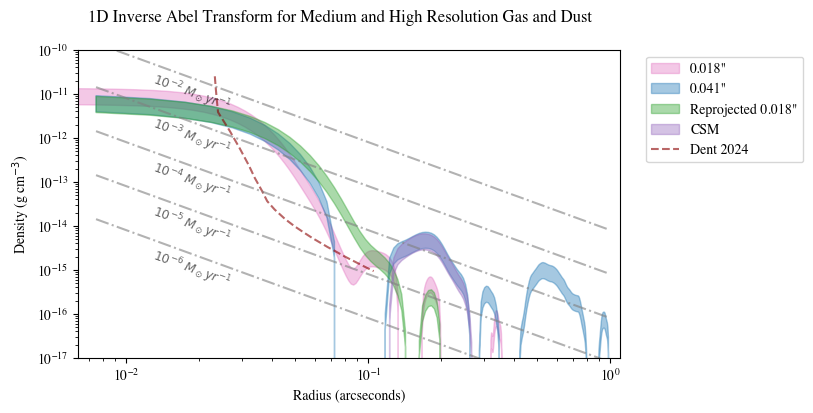

In [1021]:
plot_1d_abel_massloss(abels,info3,radius3,ax_ymin=1e-17,ax_ymax=1e-10, xmin= 1*10**-2.2,xmax=1.1, suptitle = "1D Inverse Abel Transform for Medium and High Resolution Gas and Dust" ,dent = True)
